We are part of the analyst team at a big online store. Together with the marketing
department, we've compiled a list of hypotheses that may help boost
revenue.<br>
We need to prioritize these hypotheses, launch an A/B test, and analyze the
results.

# Downloading the data

First, Let's install something, this tool will make our tables looks fabulous!

In [1]:
%%HTML
<style type="text/css">
    table.dataframe td, table.dataframe th {
        border: 1px solid lightgray;
    }
</style>

In order to remove 'warnings' we will use the following piece of code:

In [2]:
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

#### Importing libraries

In [57]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import scipy.stats as stats

#### Importing Files

Storing the data on visits, orders, and expenses in variables

In [4]:
try:
    visits = pd.read_csv('/Users/97252/OneDrive/Desktop/SecondModule/Introduction to Making Business Decisions Based on Data/visits_us.csv')
    orders = pd.read_csv ('/Users/97252/OneDrive/Desktop/SecondModule/Introduction to Making Business Decisions Based on Data/orders_us.csv')
    hypotheses = pd.read_csv('/Users/97252/OneDrive/Desktop/SecondModule/Introduction to Making Business Decisions Based on Data/hypotheses_us.csv',sep=';')
except:  
    visits = pd.read_csv ('/datasets/visits_us.csv')
    orders = pd.read_csv ('/datasets/orders_us.csv')
    hypotheses = pd.read_csv ('/datasets/hypotheses_us.csv',sep=';')

# Overview and studying the general information

## Taking a quick look at the tables

Let's take a quick look at the tables we have, using the head() method and printing the first five rows and using the info() method to prints information about them. 

### visits <br>
It's about server logs with data on website visits<br>
Se trata de registros del servidor con datos sobre visitas al sitio web. 

In [5]:
#Print the first rows from the table using the head() method.
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [6]:
#The info() method prints information about the DataFrame
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


**We have 62 rows in the visits table
<br>
<br>We have 3 columns in the visits table**<br>
**date** — date<br>
**group** — A/B test group<br>
**visits** — the number of visits on the date specified in the A/B test group
specified<br>
<br>
<br>
**Data types:** 
* The column date contain the date , but it's a object type. 
* All the remaining data types look good to us. 

**No missing values in the visits table!**

**Let's check for unique values in the group column**<br>
We want to know which groups we have and their distribution.

In [7]:
visits['group'].value_counts()

A    31
B    31
Name: group, dtype: int64

We have 2 groups: A & B. And we have 31 rows to each group.

### orders 
The orders table it's about data on orders (users that actually bought something in the online store)

In [8]:
#Print the first rows from the table using the head() method.
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [9]:
#The info() method prints information about the DataFrame
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


**We have 1197 rows in the orders table.**<br>
The number of rows in the orders table is much more that the 62 rows in the visits table. This have sense, because the visits table has data of 31 days for the groups A and B.
<br>
<br>**We have 5 columns in the orders table**<br>
**transactionId** — order identifier<br>
**visitorId** — identifier of the user who placed the order<br>
**date** — of the order<br>
**revenue** — from the order<br>
**group** — the A/B test group that the user belongs to<br>
<br>
<br>
**Data types:** 
* The column date contain the date , but it's a object type. 
* All the remaining data types look good to us. 

**No missing values in the orders table!**
<br>
**We can see that some of the visitors have gotten into both groupA and group B!**<br>
Let's check!<br>

In [10]:
#Creating a pivot table by visitorId and calculating counts of group values
orders_pivot = pd.pivot_table(orders, values='group', index=['visitorId'], aggfunc='nunique').sort_values(by='visitorId').reset_index()
orders_pivot.head()

,visitorId,group
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


In [11]:
#Using value counts to know how many users appear in the two groups
orders_pivot['group'].value_counts()

1    973
2     58
Name: group, dtype: int64

**Okay, 58 users appear in the two groups! What I do with them now?**

In [12]:
orders_a = orders.query('group == "A"')['visitorId'].to_list()
orders_b = orders.query('group == "B"')['visitorId'].to_list()

In [13]:
both = [x for x in orders_a if x in orders_b]

In [14]:
orders = orders[~orders['visitorId'].isin(both)]

**Let's check for unique values in the transactionId column**<br>
TransactionId gives to every order a unique identificator, let's check we don't have more that one transactionId for order.

In [15]:
#Using value counts to know how many users appear in the two groups
orders['transactionId'].value_counts()

3628490752    1
290089453     1
1108180333    1
446569841     1
3167192434    1
             ..
231209528     1
1537104566    1
2165344951    1
2243349176    1
4281129020    1
Name: transactionId, Length: 1016, dtype: int64

We have 1016 rows in the orders table (1197-58=1016), and 1197 transactionId. Great!

### hypotheses<br>
The file hypotheses_us.csv contains nine hypotheses on boosting an online
store's revenue with Reach , Impact , Confidence , and Effort specified for each.

In [16]:
#Print the first rows from the table using the head() method.
pd.set_option('max_colwidth', 400)
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [17]:
#The info() method prints information about the DataFrame
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


**No missing values in the hypotheses table!**

## Looking for duplicates

In [18]:
dict = {'visits':visits,'orders':orders, 'hypotheses':hypotheses}
for data in dict :
    print('Duplicates in {} table: {}'.format(data,dict[data].duplicated().sum()))

Duplicates in visits table: 0
Duplicates in orders table: 0
Duplicates in hypotheses table: 0


There are no duplicates! We can continue working. <br> 

## Optimize the data for analysis

Let's convert the object types to date with the map() method 

In [19]:
orders['date'] = orders['date'].map(lambda x: pd.datetime.strptime(x, '%Y-%M-%d'))
visits['date'] = visits['date'].map(lambda x: pd.datetime.strptime(x, '%Y-%M-%d'))

## Replace the column names (make them lowercase).
This is a important, make working with the data easier.

In [20]:
#Changing to lowercase
dict = {'visits':visits,'orders':orders, 'hypotheses':hypotheses}
for data in dict :
    print('Checking the names of the columns we changed in the {} table:'.format(data))
    dict[data].columns = dict[data].columns.str.lower()
    #let's check the names of the columns were changed 
    print(dict[data].columns) 
    print()

Checking the names of the columns we changed in the visits table:
Index(['date', 'group', 'visits'], dtype='object')

Checking the names of the columns we changed in the orders table:
Index(['transactionid', 'visitorid', 'date', 'revenue', 'group'], dtype='object')

Checking the names of the columns we changed in the hypotheses table:
Index(['hypothesis', 'reach', 'impact', 'confidence', 'effort'], dtype='object')



# Prioritizing Hypotheses

## Applying the ICE framework to prioritize hypotheses

**Calculating ICE to each hypotheses.**

In [21]:
hypotheses['ICE'] = ((hypotheses['impact']*hypotheses['confidence'])/hypotheses['effort'])
hypotheses.loc[:,['hypothesis','ICE']].sort_values(by='ICE',ascending=False)

,hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000
1,Launch your own delivery service. This will shorten delivery time,2.000000
5,Add a customer review page. This will increase the number of orders,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000
4,Change the background color on the main page. This will increase user engagement,1.000000


## Applying the RICE framework to prioritize hypotheses 

**Calculating RICE to each hypotheses.**

In [22]:
hypotheses['RICE'] = ((hypotheses['reach']*hypotheses['impact']*hypotheses['confidence'])/hypotheses['effort'])
hypotheses.loc[:,['hypothesis','RICE']].sort_values(by='RICE',ascending=False)

,hypothesis,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0
1,Launch your own delivery service. This will shorten delivery time,4.0
5,Add a customer review page. This will increase the number of orders,4.0
4,Change the background color on the main page. This will increase user engagement,3.0


*The Big Picture Thus Far:*
* We can see that the prioritization of hypotheses changes while using the RICE and ICE. This happends because of the reach parameter in the RICE calculation. In the ICE calculation we don't take into account how many users it will affect. <br> 
We see hypotheses #7 is ranked first when using RICE, and that's because his Reach parameter is 10, the highest out of all hypotheses and the highest possible rank (1-10).<br> 
On the other side Hypotheses #8 is the strongest when using ICE, with a reach level of 1.

## Showing how the prioritization of hypotheses changes when you use RICE instead of ICE 

In [23]:
#Looking at the table with all the columns 
hypotheses.head()

,hypothesis,reach,impact,confidence,effort,ICE,RICE
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,4.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,3.0


[]

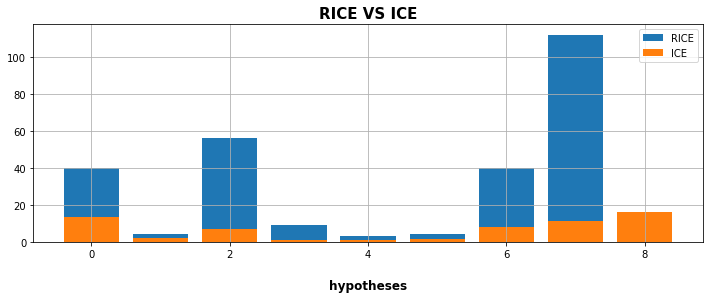

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(12,4)

ax.set_title('RICE VS ICE', weight='bold', size=15)
ax.set_xlabel("hypotheses", labelpad=20, weight='bold', size=12)

# plotting
plt.bar(hypotheses.index, hypotheses['RICE'], label='RICE')
plt.bar(hypotheses.index, hypotheses['ICE'], label='ICE')
plt.grid()
plt.legend() 
plt.plot()

*The Big Picture Thus Far:*
* We can see that the prioritization of hypotheses changes while using the RICE and ICE, while RICE is always higher than ICE for every hypothesis.

# A/B Test Analysis
We carried out an A/B test and got the results described in the files
orders_us.csv and visits_us.csv . It's time to plot some graphs and make some calculations!

Creating a DataFrame called datesGroups with unique paired 'date' and 'group' values from the orders table.Let's Get rid of duplicate values using the drop_duplicates() method.

In [25]:
datesGroups = orders[['date', 'group']].drop_duplicates()

**Declare the ordersAggregated variable to store:**  <br> 
The date  <br> 
The A/B test group  <br> 
The number of distinct orders for the test group up to the specified date, inclusive  <br> 
The number of distinct users in the test group who make at least one order up to the specified date, inclusive  <br> 
Total revenue from orders in the test group up to the specified date, inclusive  <br> 

In [26]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionid': pd.Series.nunique,
            'visitorid': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

**Declaring the visitorsAggregated variable to store:** <br> 
The date <br> 
The A/B test group <br> 
The number of distinct visitors in the test group up to the specified date

In [27]:
visitorsAggregated = datesGroups.apply(
    lambda x: visits[
        np.logical_and(
            visits['date'] <= x['date'], visits['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visits': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])


**Defing the variable cumulativeData** by joining ordersAggregated and visitorsAggregated by the columns 'date' and 'group' with the merge() method.

In [28]:
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

In [29]:
#Let's look what we got!
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-01-01 00:08:00,A,23,19,2266.6,719
1,2019-01-01 00:08:00,B,17,17,967.2,713
2,2019-01-02 00:08:00,A,42,36,3734.9,1338
3,2019-01-02 00:08:00,B,40,39,3535.3,1294
4,2019-01-03 00:08:00,A,66,60,5550.1,1845


## Plotting a graph :  cumulative revenue by group.

Declare the variables cumulativeRevenueA and cumulativeRevenueB, where you'll store the data on dates, revenue, and number of orders for groups A and B.

In [30]:
cumulativeRevenueA =  cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB =  cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

[]

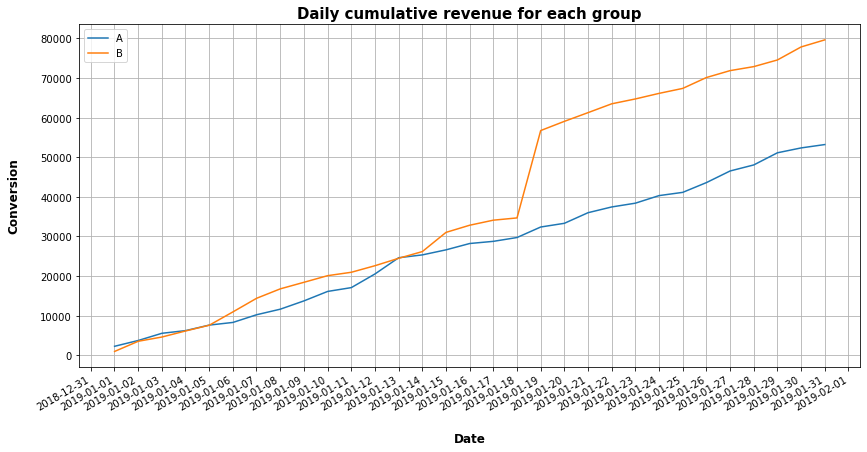

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(14,7)

ax.set_title('Daily cumulative revenue for each group', weight='bold', size=15)
ax.set_xlabel("Date", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Conversion", labelpad=20, weight='bold', size=12)

# xticks per day
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

# plotting
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'],  cumulativeRevenueB['revenue'], label='B')
plt.grid()
plt.legend()
plt.plot()

*The Big Picture Thus Far:*
* The cumulative revenue of the B group are consistently  higher  than those of the A group. At the beginning of the test, fluctuation in conversion was observed in both groups. The graph never stabilized.
* Segment B took the lead halfway through the test and held on to it. It seems like abnormally big orders affected the results after all. We'll need to get rid of them when we conduct our final analysis.<br> 

##  Plotting a graph :  average order size by group.

[]

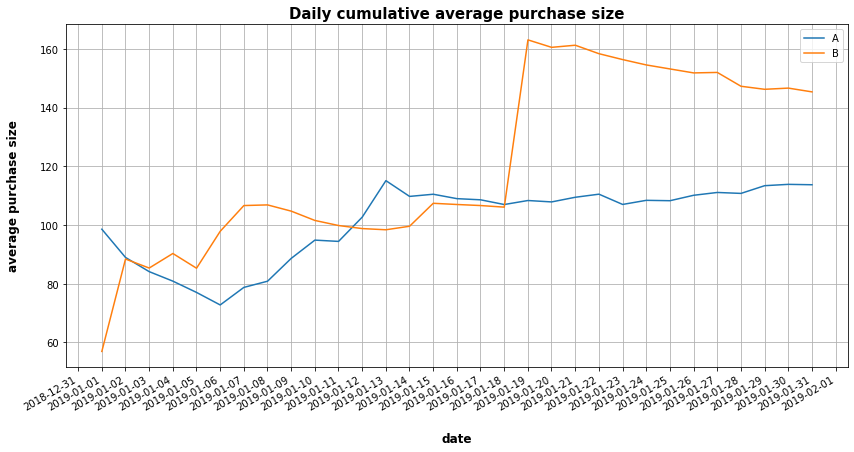

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(14,7)

ax.set_title('Daily cumulative average purchase size', weight='bold', size=15)
ax.set_xlabel("date", labelpad=20, weight='bold', size=12)
ax.set_ylabel("average purchase size", labelpad=20, weight='bold', size=12)

# xticks per day
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

# plotting
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.grid()
plt.legend()
plt.plot()

*The Big Picture Thus Far:*
* The cumulative value of the segments' average purchase sizes is still fluctuating. It's most likely too early to make decisions based on this metric. Or maybe we need to analyze the outliers that are distorsing the results. <br> 

## Plotting a graph : The relative difference in cumulative average order size for group B
compared with group A. 

Join the tables cumulativeRevenueA and cumulativeRevenueB with the merge() method so that the resulting table contains the columns ['date', 'revenueA', 'revenueB', 'ordersA', 'ordersB']. Store it in mergedCumulativeRevenue. <br>
Graph the relative difference between the cumulative average purchase size of group B compared with that of group A. <br>
Add a dotted-line X-axis (Y = 0) using the plt.axhline() method. <br>

In [33]:
# gathering the data into one DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

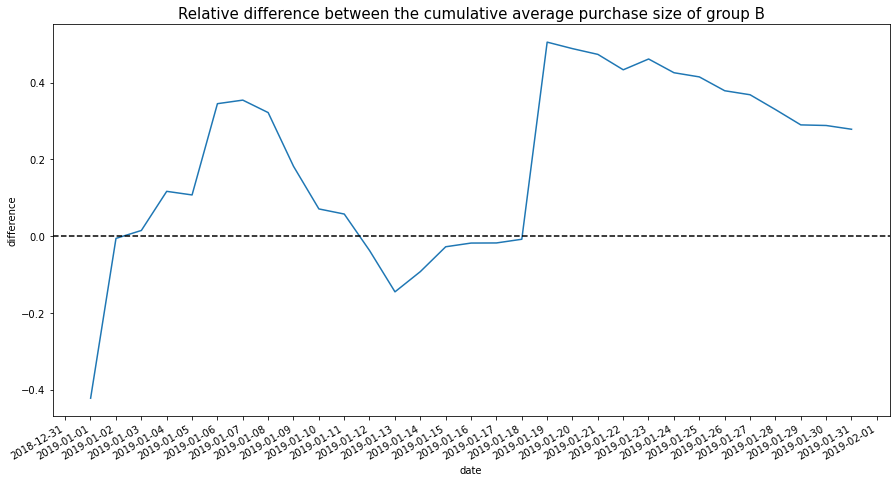

In [34]:
fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(data=mergedCumulativeRevenue, x='date', 
             y=(mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# Add labels platforms that used to be popular but now have zero sales
ax.set_title('Relative difference between the cumulative average purchase size of group B', fontdict={'size':15})
ax.set_ylabel('difference')
ax.set_xlabel('date')

# xticks per day
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

# adding the X axis
plt.axhline(y=0, color='black', linestyle='--') 

plt.show()

*The Big Picture Thus Far:*
* There were several sudden and considerable changes. Maybe they have to do with abnormally large purchases.

## Calculating each group's conversion rate 
as the ratio of orders to the number of visits for each day. <br> 
Plot the daily conversion rates of the two groups and describe the difference.

In [35]:
# calculating cumulative conversion
cumulativeData['conversion'] = (
    cumulativeData['orders'] / cumulativeData['visitors'])
# calculating cumulative conversion percent
cumulativeData['conversion'] = (
    cumulativeData['orders'] / cumulativeData['visitors']) * 100

In [36]:
# Print cumulativeData table
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-01-01 00:08:00,A,23,19,2266.6,719,3.198887
1,2019-01-01 00:08:00,B,17,17,967.2,713,2.384292
2,2019-01-02 00:08:00,A,42,36,3734.9,1338,3.139013
3,2019-01-02 00:08:00,B,40,39,3535.3,1294,3.091190
4,2019-01-03 00:08:00,A,66,60,5550.1,1845,3.577236


Declare the variables cumulativeDataA and cumulativeDataB, we'll store the data on orders in the segments A and B.

In [37]:
# selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

**Plotting the daily cumulative conversion graph of each group.**

[]

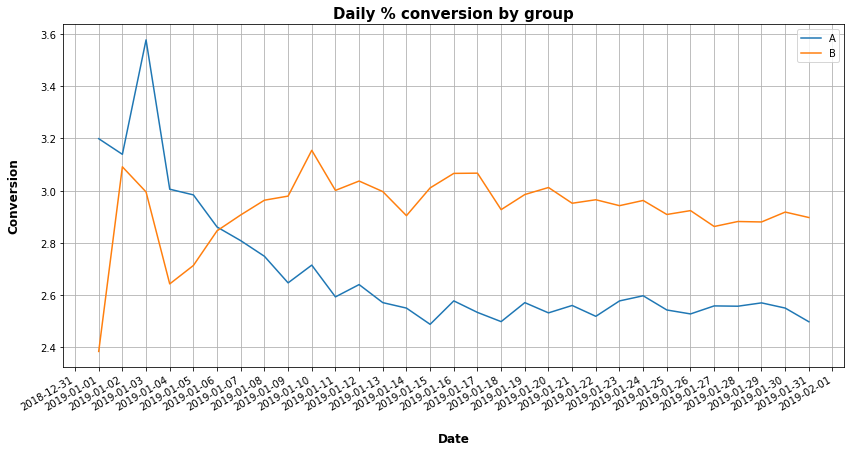

In [38]:
fig, ax = plt.subplots()
fig.set_size_inches(14,7)

ax.set_title("Daily % conversion by group", weight='bold', size=15)
ax.set_xlabel("Date", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Conversion", labelpad=20, weight='bold', size=12)

# xticks per day
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

# plotting
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.grid()
plt.legend()
plt.plot()

## Plotting a scatter chart of the number of orders per user. 

We already found the statistical significance of a difference in metrics between samples and saw graphs. These are two huge steps on the path to correct decision-making in experiments.<br> 
However, there are more obstacles to overcome: outliers/anomalies, which can distort the results of an A/B test. Recall that an anomaly is a value that appears rarely in a statistical population but can introduce error when it does.

**First, let's find the number of orders per user.**

In [39]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1) 
    .groupby('visitorid', as_index=False)
    .agg({'transactionid' : pd.Series.nunique})
)
ordersByUsers.columns = ['userId','orders']

print(ordersByUsers.sort_values(by='orders',ascending=False).head(5))

         userId  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3


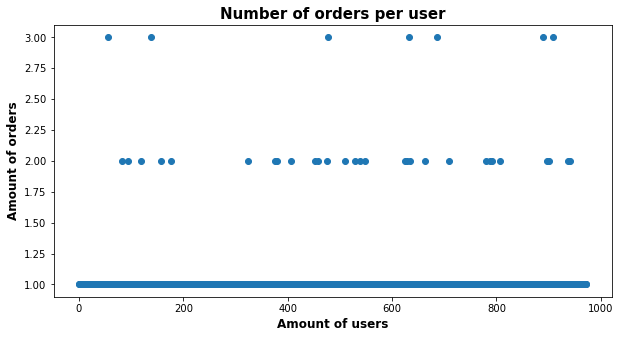

In [40]:
x_values = pd.Series(range(0,len(ordersByUsers)))

fig, ax = plt.subplots()
fig.set_size_inches(10,5)

ax.set_title('Number of orders per user', weight='bold', size=15)
ax.set_xlabel('Amount of users', weight='bold', size=12)
ax.set_ylabel('Amount of orders', weight='bold', size=12)

plt.scatter(x_values, ordersByUsers['orders']);

*The Big Picture Thus Far:*
* There are very few users with two or three orders. These cases may as well turn out to be anomalies. Three orders es that typical or a lot? We will canculate percentiles to answer this uestion.<br> 

## Calculating the 95th and 99th percentiles for the number of orders per user.
This will help us to define the point at which a data point becomes an anomaly.

In [41]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

*The Big Picture Thus Far:*
* We can see that at less 95% of our users have 1 order and the 99% 2 orders.
* It will be reasonable to remove users with 2 or 3 orders from our data and consider them anomalies, as they sum up to be less that 5% of our data.<br> 

## Plotting a scatter chart of order prices. 

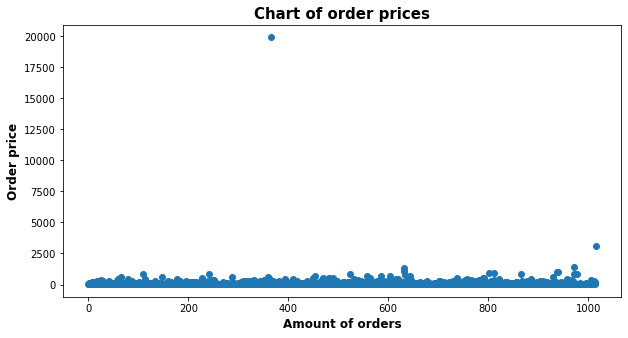

In [43]:
x_values = pd.Series(range(0,len(orders['revenue'])))
fig, ax = plt.subplots()
fig.set_size_inches(10,5)

ax.set_title('Chart of order prices', weight='bold', size=15)
ax.set_xlabel('Amount of orders', weight='bold', size=12)
ax.set_ylabel('Order price', weight='bold', size=12)

plt.scatter(x_values, orders['revenue']);

*The Big Picture Thus Far:*
* There aren't many orders that cost more than 250000. There are outliers of about 500000-2000000.

## Calculating the 95th and 99th percentiles for the chart of order prices.
This will help us to define the point at which a data point becomes an anomaly.

In [44]:
np.percentile(orders['revenue'], [95, 99])

array([414.275, 830.3  ])

*The Big Picture Thus Far:*
* Not more than 5%, of users placerd orders that cost more than 414. Not more than 1% placed orders more expensive than 830.

## Finding the statistical significance of the difference in conversion between the groups using the raw data. 

We already visually evaluated A/B test results and determined that the data most likely contains outliers. <br>
We also found the outliers and determined where to set the boundary for identifying them as such.<br>
Let's find the statistical significance of differences in conversion rate and order size between the groups, using the "raw" data (that is, the data before the removal of anomalies).

Calculating samples for both groups for the test

In [48]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders'] 

Now we'll declare the variables sampleA and sampleB, with users from different groups and corresponding numbers of orders. Those who didn't order anything will have 0. This is necessary to prepare the samples for the Mann-Whitney test.

In [55]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [59]:
print("pvalue: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("relative difference between B to A: {0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

pvalue: 0.006
relative difference between B to A: 0.160


*The Big Picture Thus Far:*
* The p-value is considerably lower than 0.05, so we reject the null hypothesis. The raw data analysis showed that the groups' conversion rates have statistically significant differences. The relative conversion gain for group B compared with group A is 16%
* Now we just need to compare the average order sizes using the raw data, and then compare both metrics again with the outliers filtered out.

## Finding the statistical significance of the difference in average order size between the groups using the raw data. 

We'll also find the relative difference in average order size between the groups:

In [60]:
print('pvalue: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('relative difference between B to A: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

pvalue: 0.431
relative difference between B to A: 0.278


*The Big Picture Thus Far:*
* The p-value is greater than 0.05, so there are no statistically sifnificant differences between the groups' average order sizes.
* Moreover, the relative difference is 27,8%.

## Finding the statistical significance of the difference in conversion between the groups using the filtered data

We'll consider anomalous users those who made 2 or more orders or placed one for more than $414. Thus, we'll remove the 1% of users with the most orders and between 1% and 5% of the most expensive orders.

In [66]:
usersWithManyOrders = (pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
                                  ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0))

usersWithExpensiveOrders = orders[orders['revenue'] > 10000]['visitorid']

abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders],
                           axis = 0).drop_duplicates().sort_values())
abnormalUsers

33      249864742
58      611059232
425    1920142716
211    2108163459
347    2742574263
310    2988190573
409    3908431265
416    3967698036
dtype: int64

Now you have a set of anomalous users. After they are removed, it'll be time to calculate statistical significance. We'll need to know whether the filtered data shows any significant difference between the groups.

In [68]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [71]:
print("pvalue: {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("relative difference between B to A: {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

pvalue: 0.004
relative difference between B to A: 0.183


*The Big Picture Thus Far:*
* The results for conversion almost didn't change.

## Finding the statistical significance of the difference in average order size between the groups using the filtered data. 

In [76]:
print('pvalue: {0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'])[1]))

print('relative difference between B to A: {0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

pvalue: 0.355
relative difference between B to A: -0.042


*The Big Picture Thus Far:*
* The p-value increased a bit, but now the difference between the group is -0.042 instead of 27,8%.
* There is not reason to reject the null hypothesis and conclude that average order size differs between the groups.

# Conclusions 

* The raw data revealed a statistically significant difference in conversion between the groups, as group B had 16% higher conversion.
* The filtered data revealed a statistically significant difference in conversion between the groups, as group B had 18% higher conversion.
* The raw data showed Group B had 27% lead over group A in terms of average order size.
* The filtered data showed Group B's average order size is almost the same (-0.042) as group A's
* Neither raw or filtered data revealed any statistically significant diffeences in average order size between the groups.

**We conclude that we should stop the test and consider group B as the leading group in terms of conversion (+18%), as this is a crucial metric for our goal - boosting the revenue and this gap of 18% is a big enough increase in conversion to call group B the most succesful group**